In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Fraud.csv')
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
32284,8,CASH_OUT,163108.06,C1774469791,0.00,0.00,C1805253792,697798.00,1456250.85,0,0
319319,16,CASH_IN,39177.16,C198641302,25000000.00,25000000.00,C851079134,444816.91,144464.21,0,0
711263,37,CASH_OUT,190513.68,C612386209,14788.00,0.00,C1099545481,0.00,190513.68,0,0
963774,44,CASH_IN,132547.40,C488488764,510582.34,643129.74,C514412771,1947306.42,1814759.01,0,0
986290,45,CASH_OUT,132229.52,C1127005052,0.00,0.00,C1184832349,2752315.89,2884545.41,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
df.shape

(1048575, 11)

In [5]:
df['index_column'] = df.index

In [6]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,index_column
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,2


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'index_column'],
      dtype='object')

In [8]:
df.duplicated().sum() # It means no duplicates, USE df.drop_duplicates() if duplicates are there

0

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
index_column      0
dtype: int64

In [10]:
np.round(df.describe(),1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,index_column
count,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0
mean,27.0,158667.0,874009.5,893808.9,978160.0,1114198.0,0.0,0.0,524287.0
std,15.6,264940.9,2971750.6,3008271.3,2296780.4,2416593.1,0.0,0.0,302697.7
min,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,15.0,12149.1,0.0,0.0,0.0,0.0,0.0,0.0,262143.5
50%,20.0,76343.3,16002.0,0.0,126377.2,218260.4,0.0,0.0,524287.0
75%,39.0,213761.9,136642.0,174600.0,915923.5,1149807.5,0.0,0.0,786430.5
max,95.0,10000000.0,38900000.0,38900000.0,42100000.0,42200000.0,1.0,0.0,1048574.0


In [11]:
df.corr()['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
index_column      0.026025
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [12]:
df['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [13]:
df.drop('isFlaggedFraud',axis=1,inplace=True)
df.shape

(1048575, 11)

In [14]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

0    1047433
1       1142
Name: isFraud, dtype: int64

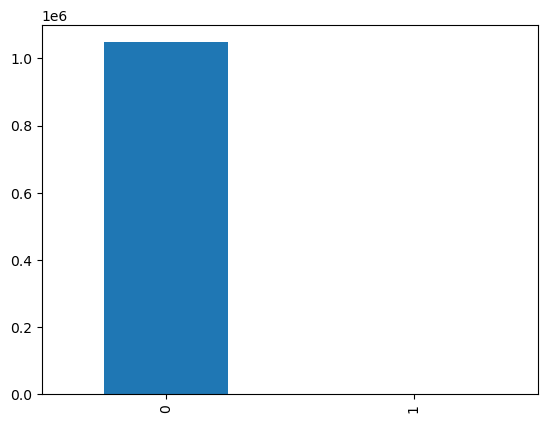

In [15]:
df['isFraud'].value_counts().plot(kind='bar')
df['isFraud'].value_counts() 
# IT IS COMPLETELY A IMBALANCED DATASET, WHICH MEANS THAT WE SHOULD USE ONLY F1-Score as metric

## As it is completely an Imbalanced Dataset, which means that we have to convert Imbalanced Dataset To Balanced Dataset & Should consider only Precision, Recall, And F1-Score as the Metrics

In [16]:
print(list(sorted(df['step'].unique())))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

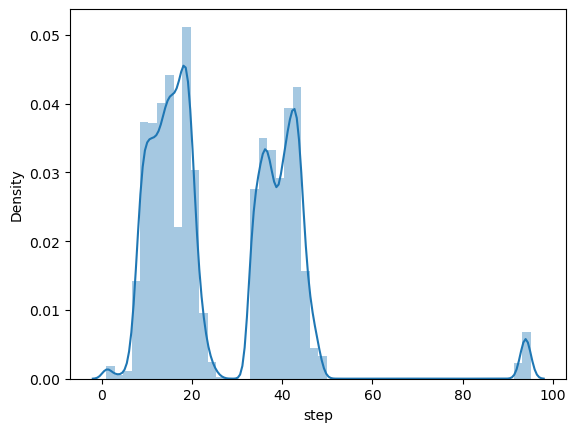

In [17]:
sns.distplot(df['step'])

In [18]:
df.groupby('step').mean()['isFraud']*100 #For identifying steps which regularly do fraud transactions

step
1       0.590842
2       0.788955
3       0.724638
4       1.769912
5       0.902256
         ...    
91    100.000000
92    100.000000
93      0.360036
94      0.115696
95      0.268456
Name: isFraud, Length: 95, dtype: float64

In [19]:
#For identifying steps which regularly do fraud transactions (IN A MORE CLEAR WAY)
fraud_steps=pd.DataFrame(df.pivot_table(values='isFraud', index='step', aggfunc='mean') * 100)
fraud_steps[fraud_steps['isFraud']>30]

,isFraud
step,
28,100.0
29,100.0
30,100.0
31,100.0
32,100.0
50,100.0
51,100.0
52,100.0
53,100.0


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='step', ylabel='isFraud'>

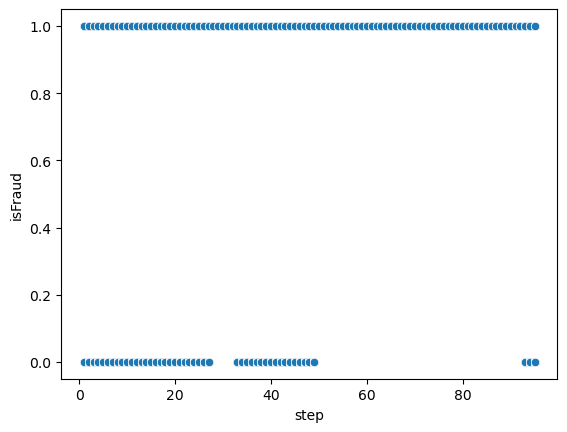

In [20]:
sns.scatterplot(df['step'],df['isFraud'])

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

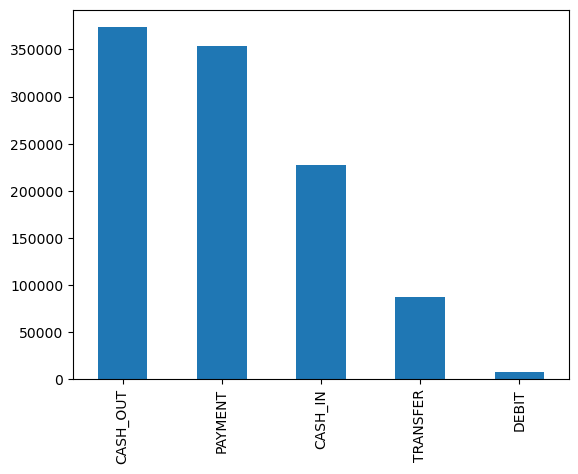

In [21]:
df['type'].value_counts().plot(kind='bar')
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

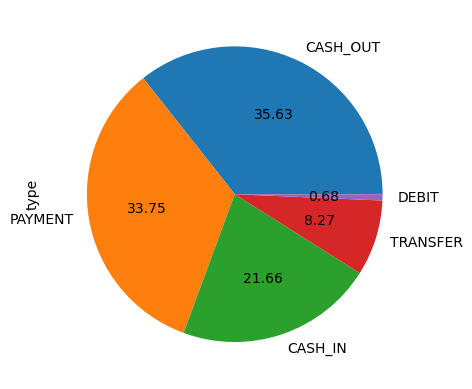

In [22]:
df['type'].value_counts().plot(kind='pie',autopct='%.2f')
df['type'].value_counts()

In [23]:
df['amount'].value_counts()

10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: amount, Length: 1009606, dtype: int64

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

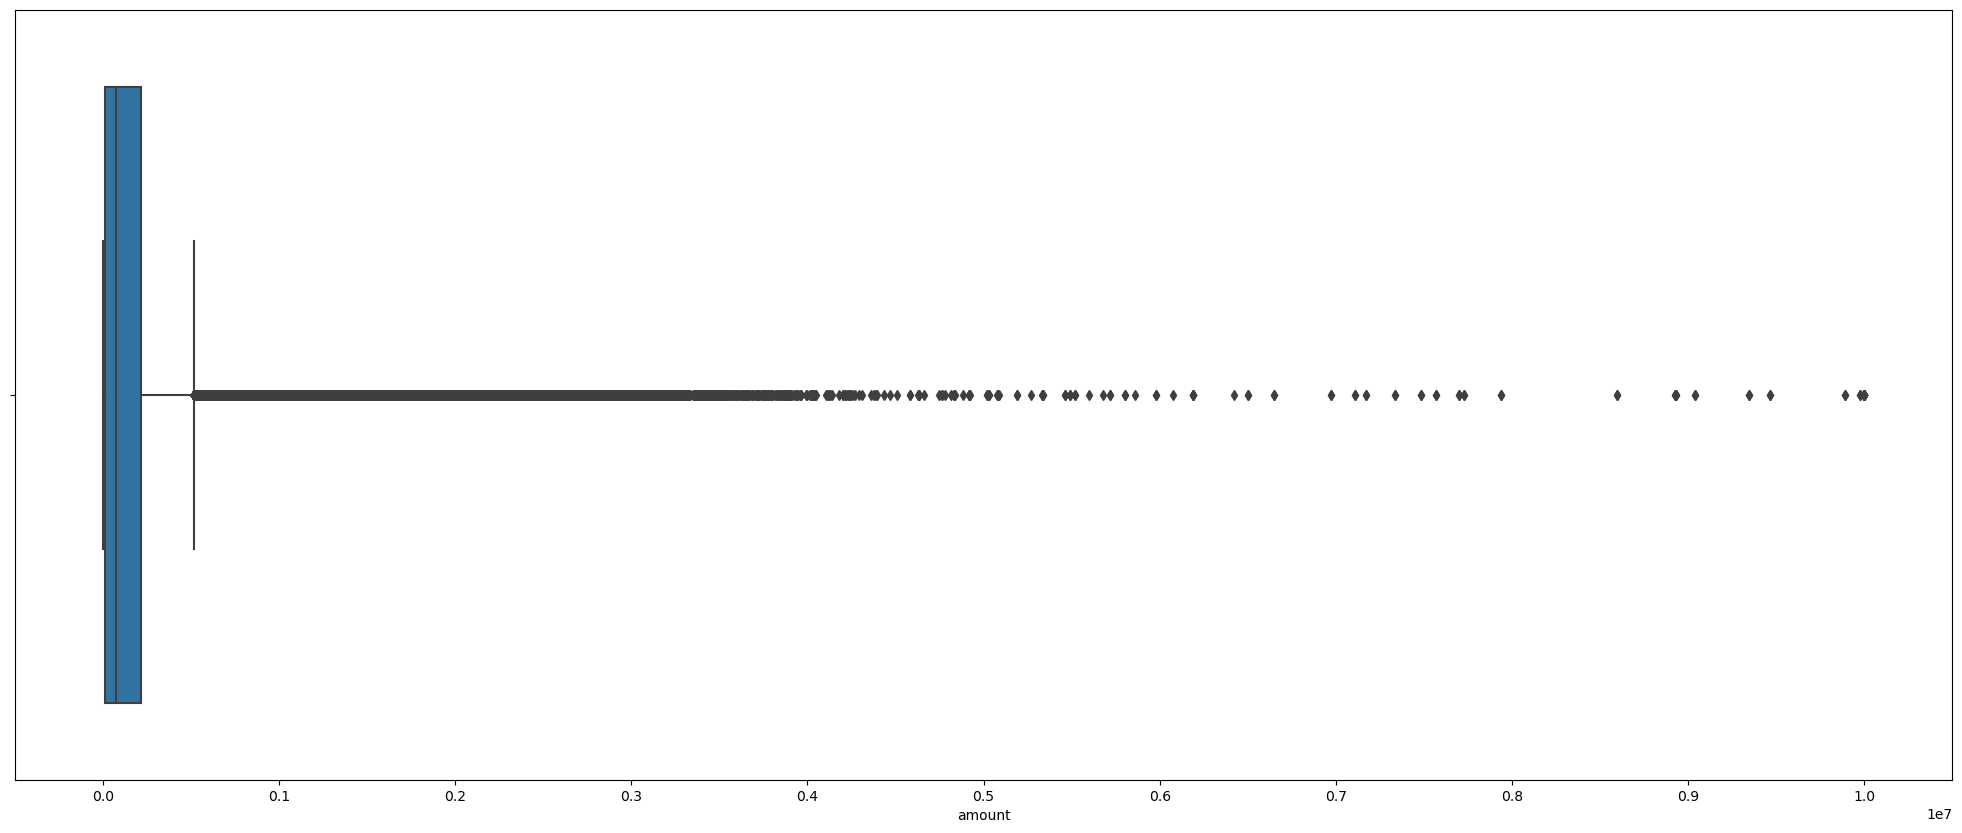

In [24]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,11000000,1000000)])
sns.boxplot(df['amount'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

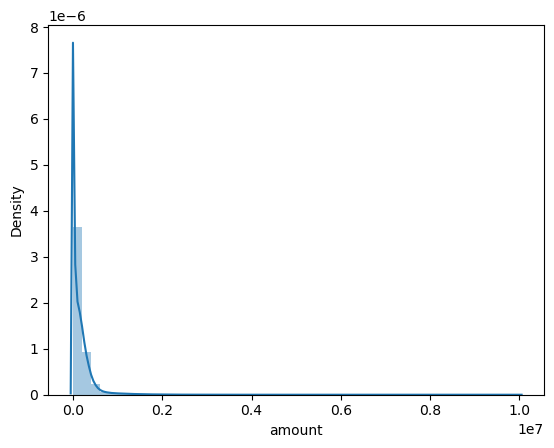

In [25]:
sns.distplot(df['amount'])

<AxesSubplot:xlabel='amount', ylabel='Count'>

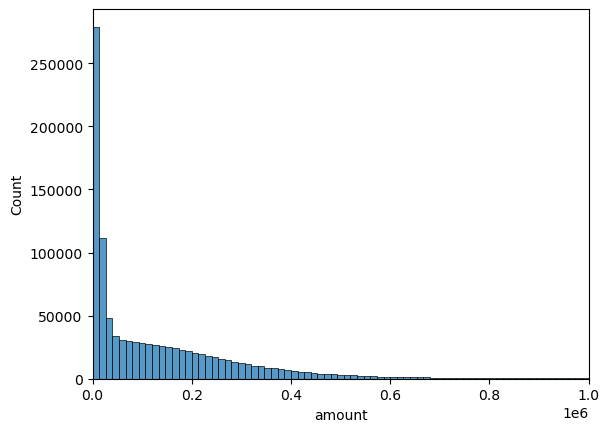

In [26]:
plt.xlim(0,1000000)
sns.histplot(df['amount'],bins=750)

In [27]:
np.round(df['amount'].describe(),2)

count     1048575.00
mean       158666.98
std        264940.93
min             0.10
25%         12149.06
50%         76343.33
75%        213761.89
max      10000000.00
Name: amount, dtype: float64

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

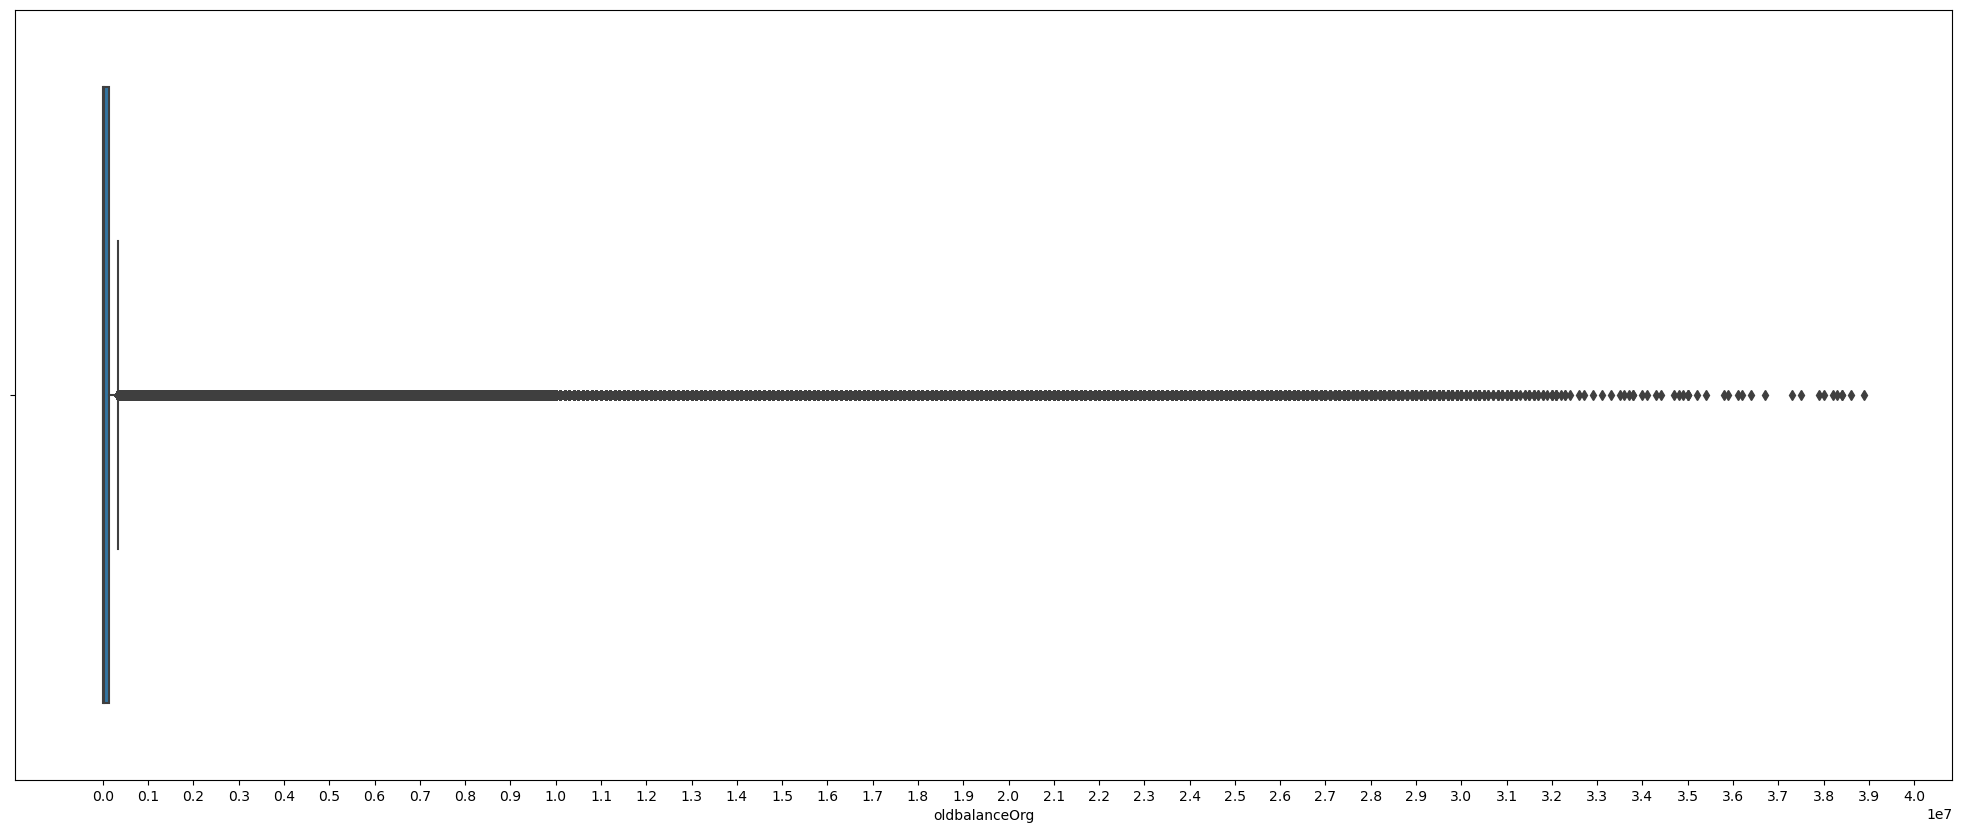

In [28]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,41000000,1000000)])
sns.boxplot(df['oldbalanceOrg'])

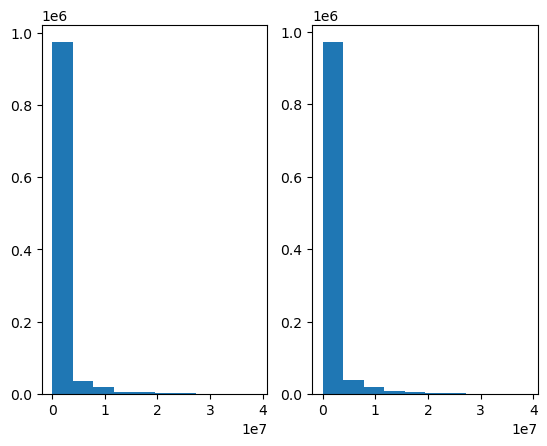

In [29]:
plt.subplot(1,2,1)
plt.hist(df['oldbalanceOrg'])

plt.subplot(1,2,2)
plt.hist(df['newbalanceOrig'])

plt.show()

In [30]:
df['nameDest'].nunique()

449635

In [31]:
df['oldbalanceDest'].nunique()

590110

In [32]:
np.round(df['oldbalanceDest'].describe(),2)

count     1048575.00
mean       978160.05
std       2296780.39
min             0.00
25%             0.00
50%        126377.21
75%        915923.48
max      42100000.00
Name: oldbalanceDest, dtype: float64

In [33]:
df['newbalanceDest'].nunique()

437054

In [34]:
np.round(df.oldbalanceDest.describe(),2)

count     1048575.00
mean       978160.05
std       2296780.39
min             0.00
25%             0.00
50%        126377.21
75%        915923.48
max      42100000.00
Name: oldbalanceDest, dtype: float64

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

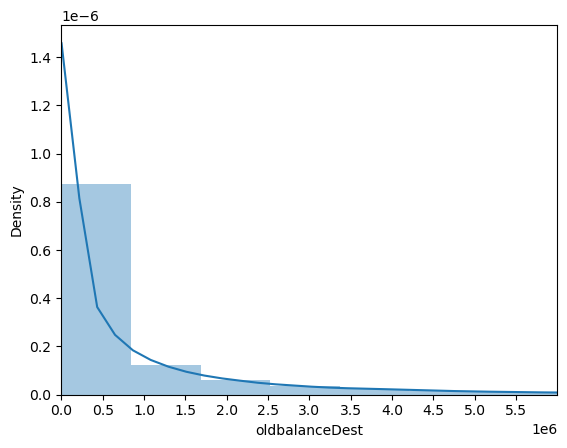

In [35]:
plt.xlim(0,6000000,1000000)
plt.xticks([r for r in range(0,6000000,500000)])
sns.distplot(df['oldbalanceDest'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceDest'>

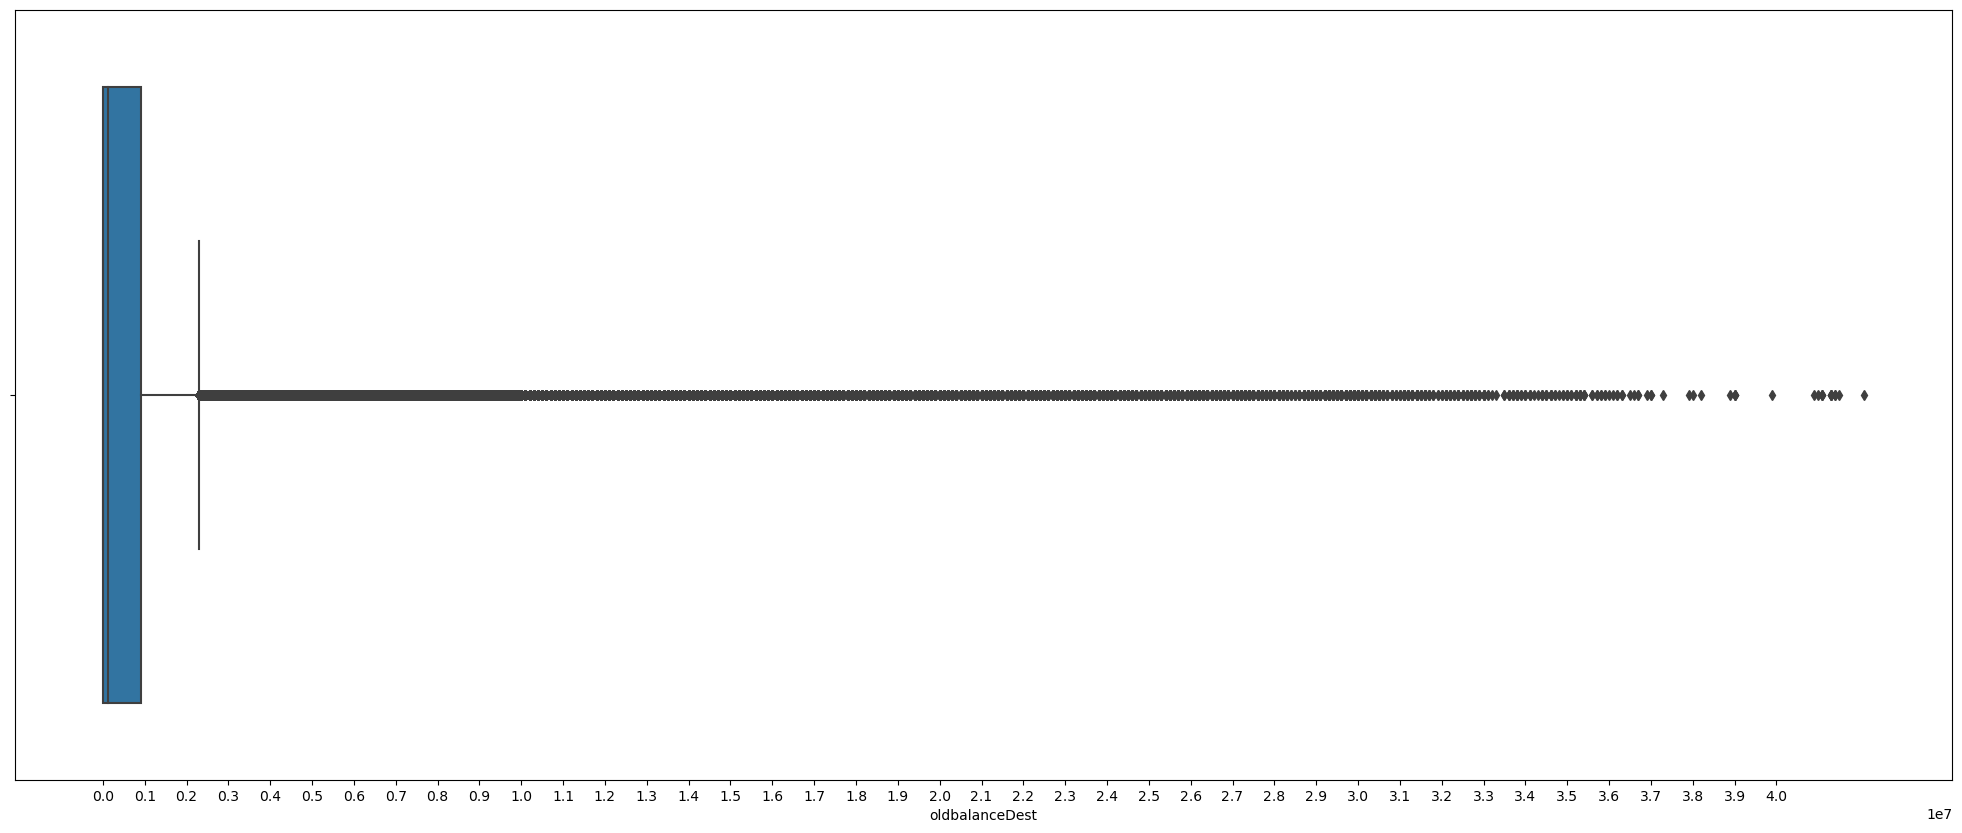

In [36]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,41000000,1000000)])
sns.boxplot(df['oldbalanceDest'])

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

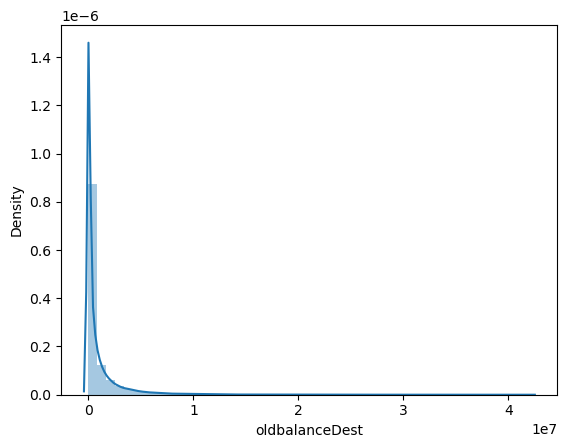

In [37]:
sns.distplot(df['oldbalanceDest'])

## BIVARIATE OR MULTI VARIATE ANALYSIS


### => EDA(Exploration Data Analysis using multi variables)

<AxesSubplot:ylabel='step'>

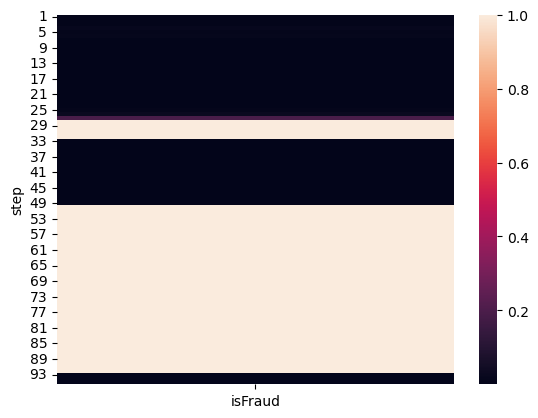

In [38]:
sns.heatmap(df.pivot_table(values='isFraud',index='step'))

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='step', ylabel='isFraud'>

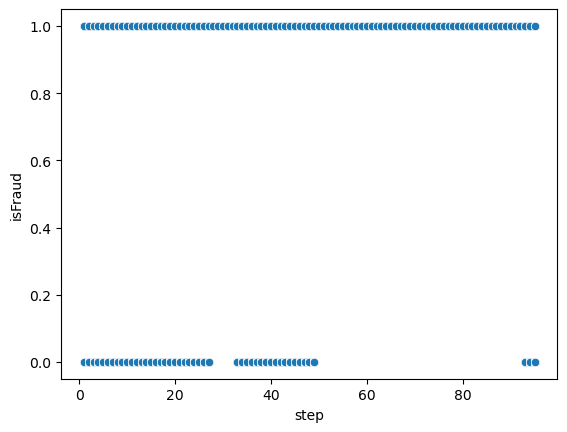

In [39]:
sns.scatterplot(df['step'],df['isFraud'])

In [40]:
# sns.pairplot(df,hue='isFraud')

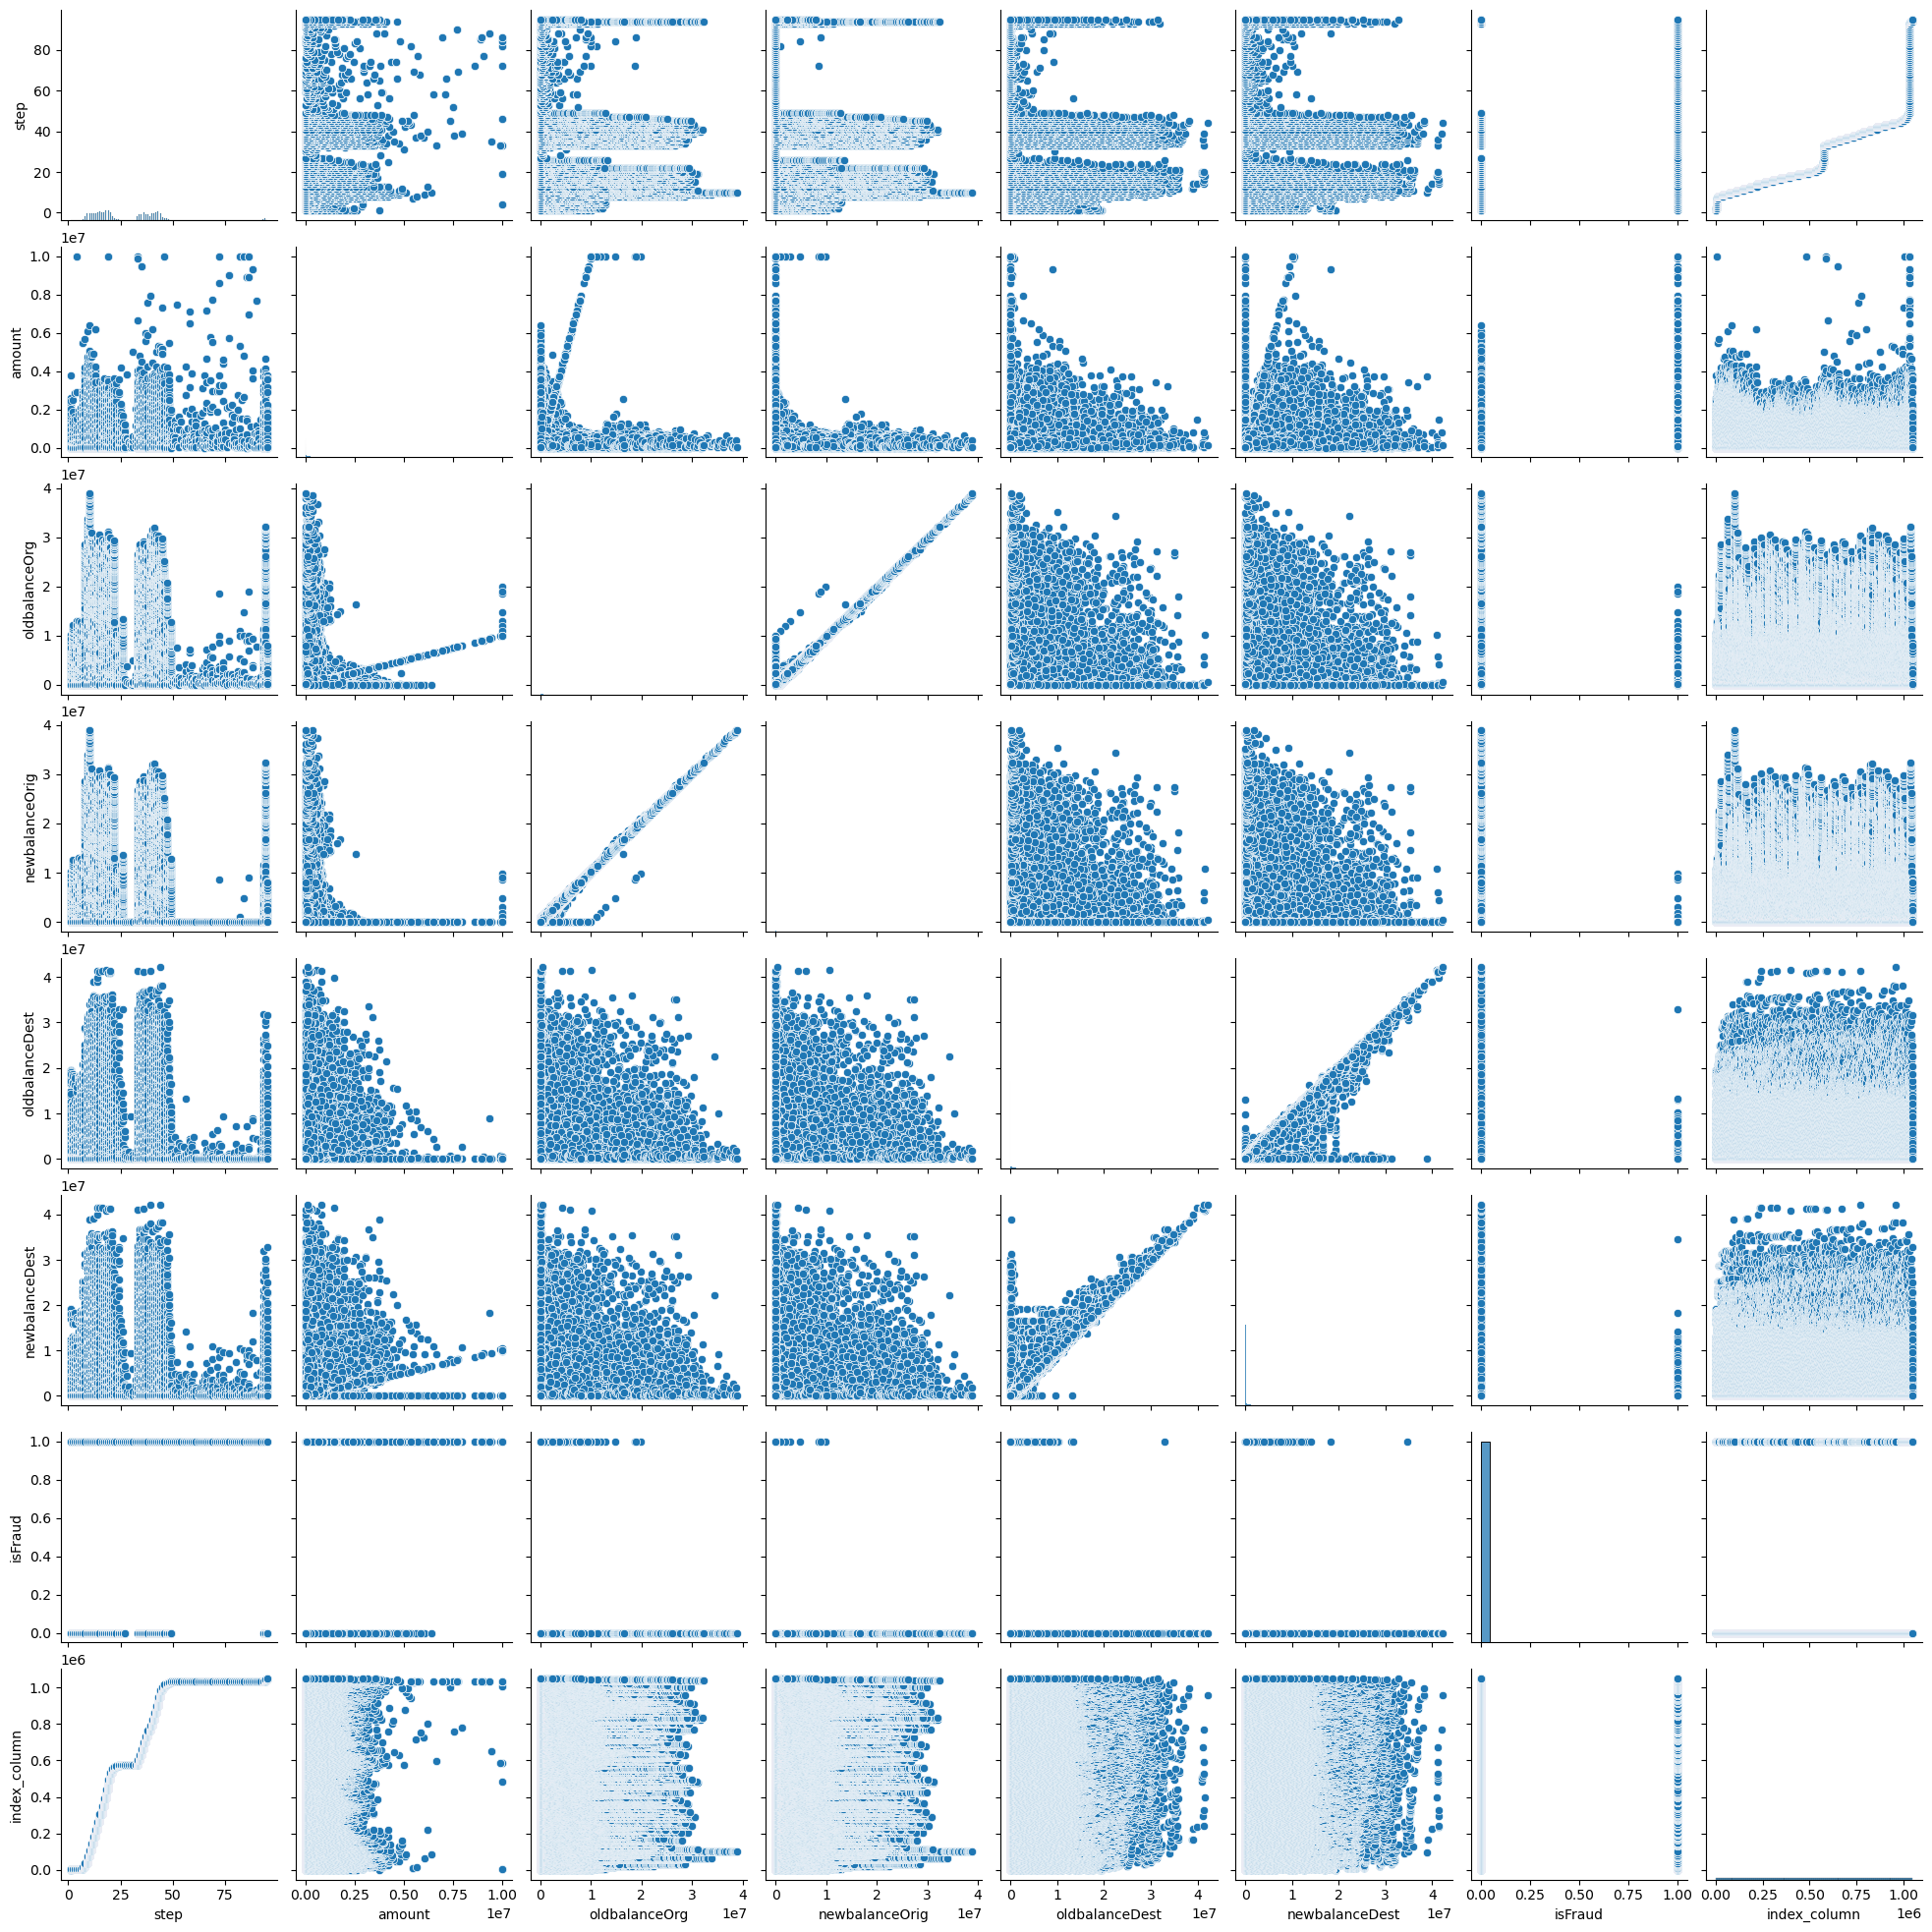

In [41]:
sns.pairplot(df)

In [42]:
pd.crosstab(df['type'],df['isFraud'])

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


<AxesSubplot:xlabel='isFraud', ylabel='type'>

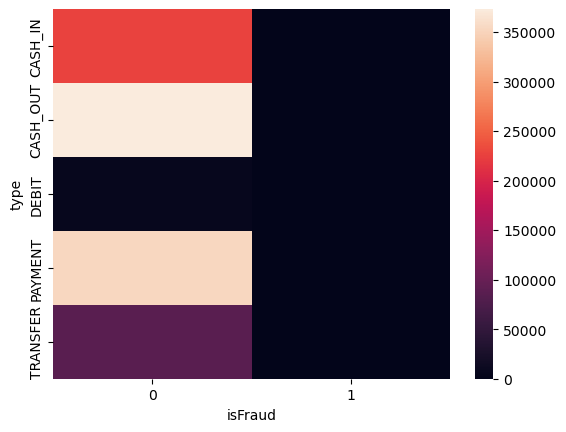

In [43]:
sns.heatmap(pd.crosstab(df['type'],df['isFraud']))

In [44]:
df.groupby('type').mean()['isFraud']*100

type
CASH_IN     0.000000
CASH_OUT    0.154694
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.650122
Name: isFraud, dtype: float64

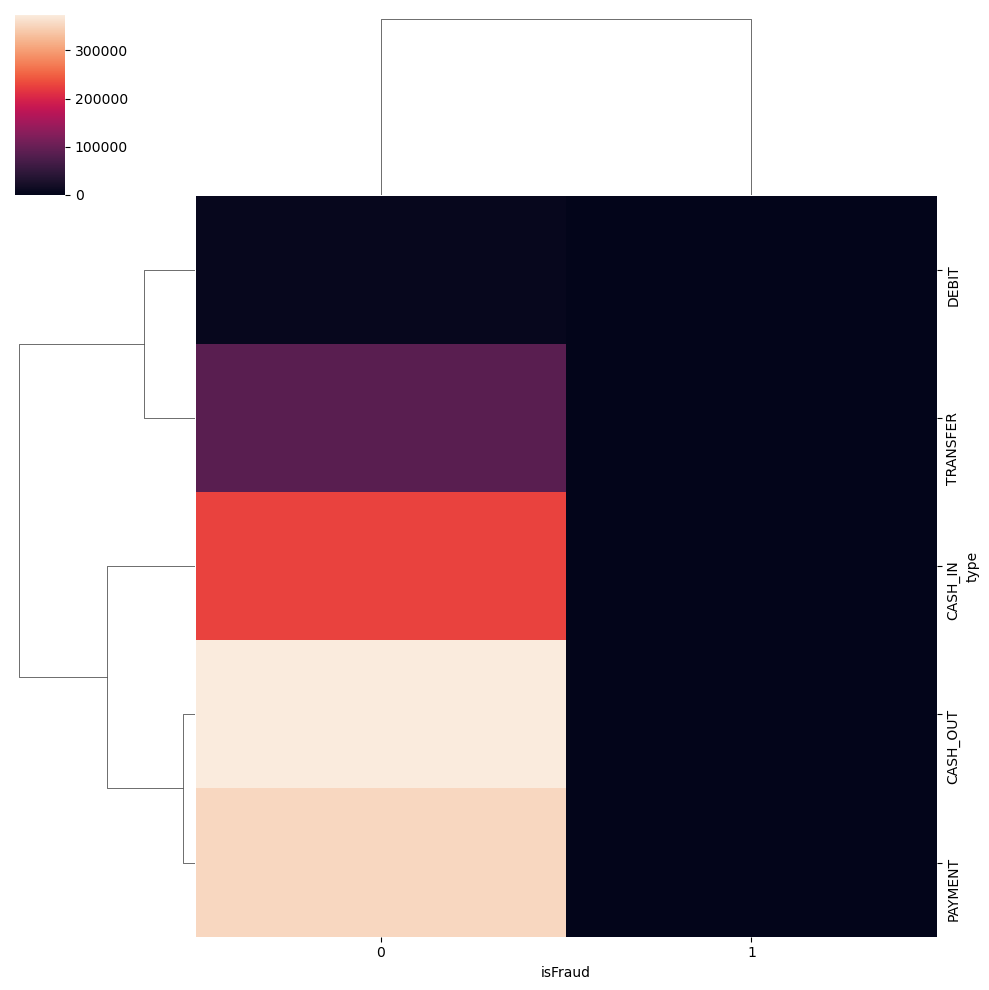

In [45]:
sns.clustermap(pd.crosstab(df['type'],df['isFraud']))

In [46]:
df['cat_nameDest']=df['nameDest'].str[0]
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,index_column,cat_nameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,M


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


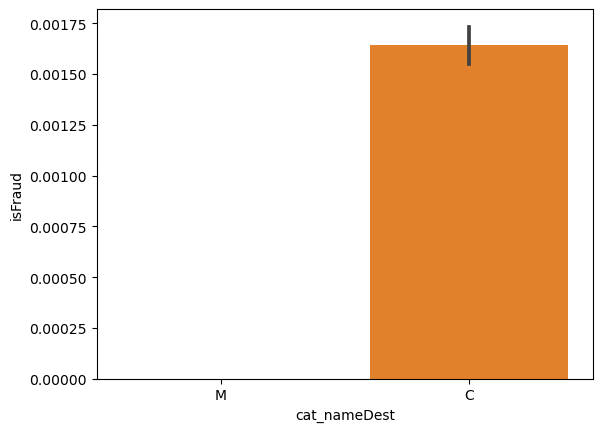

In [47]:
sns.barplot(df['cat_nameDest'],df['isFraud'])
plt.show()

In [48]:
cross_tab = pd.crosstab(df['cat_nameDest'], df['isFraud'])

print("Cross-tabulation of 'cat_nameDest' and 'isFraud':")
cross_tab

Cross-tabulation of 'cat_nameDest' and 'isFraud':


isFraud,0,1
cat_nameDest,,
C,693560,1142
M,353873,0


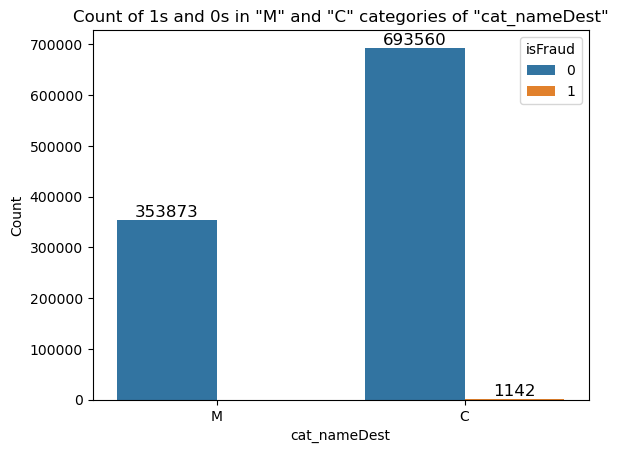

In [49]:
df.dropna(subset=['cat_nameDest', 'isFraud'], inplace=True)

sns.barplot(x='cat_nameDest', y='isFraud', data=df, hue='isFraud', estimator=lambda x: len(x))

plt.xlabel('cat_nameDest')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in "M" and "C" categories of "cat_nameDest"')

ax=plt.gca()
for p in ax.patches:
    height=p.get_height()
    if not np.isnan(height):  # Check if the height is not NaN
        ax.text(p.get_x() + p.get_width()/2., height, '%d' % int(height), 
                fontsize=12, color='black', ha='center', va='bottom')

plt.show()

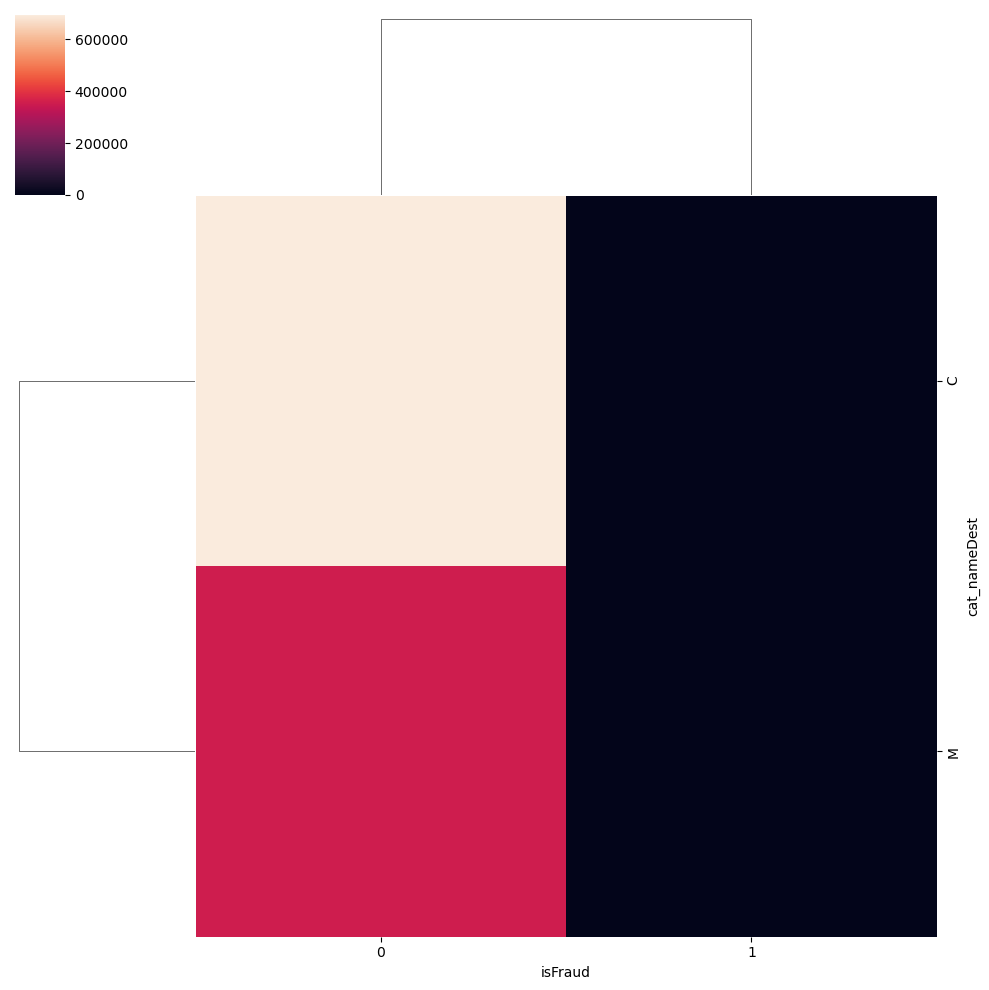

In [50]:
sns.clustermap(pd.crosstab(df['cat_nameDest'],df['isFraud']))

In [51]:
fraudulent_cases=df[df['isFraud'] == 1]
fraudulent_cases[fraudulent_cases['cat_nameDest']=='C']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,index_column,cat_nameDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,2,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,3,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,251,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,252,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,680,C
...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,1047888,C
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,1048221,C
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,1048222,C
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,1048323,C


In [52]:
df.drop(['nameDest','nameOrig'],axis=1,inplace=True)

In [53]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'index_column',
       'cat_nameDest'],
      dtype='object')

## Splitting the data

In [54]:
from sklearn.model_selection import train_test_split as tts
X=df.drop(['isFraud'],axis=1)
Y=df['isFraud']
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.25,random_state=14)

In [55]:
xtrain.shape,ytrain.shape

((786431, 9), (786431,))

In [56]:
xtest.shape,ytest.shape

((262144, 9), (262144,))

In [57]:
xtrain.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
64581,9,CASH_IN,109401.95,7908280.43,8017682.38,965913.11,1370179.88,64581,C
115565,11,PAYMENT,12557.05,84262.71,71705.66,0.00,0.00,115565,M


## Feature Scaling

### Using RobustScaler scaling technique, as 'amount' variable is having outliers.


In [58]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
xtrain['amount'] = robust_scaler.fit_transform(xtrain.amount.values.reshape(-1,1))
xtrain.sample(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
277341,15,CASH_OUT,0.918589,21703.0,0.00,0.00,261608.49,277341,C
110590,11,TRANSFER,0.232885,0.0,0.00,445218.06,568536.36,110590,C
420348,18,CASH_IN,0.904579,198.0,258981.10,84335.00,0.00,420348,C
916913,43,PAYMENT,-0.375179,40428.0,39741.89,0.00,0.00,916913,M
180412,12,CASH_OUT,3.335201,72194.0,0.00,13900000.00,14400000.00,180412,C


In [59]:
xtest['amount'] = robust_scaler.transform(xtest.amount.values.reshape(-1,1))
xtest.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
750195,38,PAYMENT,-0.377221,0.0,0.0,0.0,0.0,750195,M
329421,16,PAYMENT,-0.368990,0.0,0.0,0.0,0.0,329421,M


In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain['step']=ss.fit_transform(xtrain['step'].values.reshape(-1,1))
xtrain.sample(4)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
570676,-0.254229,PAYMENT,-0.334951,16570.28,7771.09,0.00,0.00,570676,M
375581,-0.638228,CASH_OUT,0.687087,0.00,0.00,380502.25,595422.42,375581,C
478494,-0.510228,CASH_OUT,-0.240022,0.00,0.00,2853276.20,2994081.95,478494,C
992208,1.153766,PAYMENT,-0.366946,21058.00,18711.49,0.00,0.00,992208,M


In [61]:
xtest['step'] = ss.transform(xtest.step.values.reshape(-1,1))
xtest.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
750195,0.705768,PAYMENT,-0.377221,0.0,0.0,0.0,0.0,750195,M
329421,-0.702228,PAYMENT,-0.368990,0.0,0.0,0.0,0.0,329421,M


In [62]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,dtype=np.int32)

In [63]:
xtrain['cat_nameDest']=ohe.fit_transform(xtrain['cat_nameDest'].values.reshape(-1,1))
xtrain.sample(3)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
78833,-1.086227,CASH_OUT,0.387283,73343.0,0.0,0.00,154456.81,78833,1
881496,0.961767,TRANSFER,2.388682,383.0,0.0,244428.04,658648.44,881496,1
899422,0.961767,CASH_OUT,0.371471,0.0,0.0,184285.04,335552.92,899422,1


In [64]:
xtest['cat_nameDest'] = ohe.transform(xtest.cat_nameDest.values.reshape(-1,1))
xtest.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest
750195,0.705768,PAYMENT,-0.377221,0.0,0.0,0.0,0.0,750195,0
329421,-0.702228,PAYMENT,-0.368990,0.0,0.0,0.0,0.0,329421,0


In [65]:
ohe2 = OneHotEncoder(sparse=False, drop='first', dtype=int)

In [66]:
Xtrain=ohe2.fit_transform(xtrain['type'].values.reshape(-1,1))
Xtrain=pd.DataFrame(Xtrain,columns=ohe2.get_feature_names_out(['type']),index=xtrain['index_column'])
Xtrain.head(4)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
index_column,,,,
64581,0,0,0,0
115565,0,0,1,0
383766,1,0,0,0
276750,0,0,1,0


In [67]:
new_xtrain = pd.merge(xtrain,Xtrain,on="index_column")
new_xtrain.head(4)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.150226,CASH_IN,0.163882,7908280.43,8017682.38,965913.11,1370179.88,64581,1,0,0,0,0
1,-1.022227,PAYMENT,-0.316318,84262.71,71705.66,0.00,0.00,115565,0,0,0,1,0
2,-0.638228,CASH_OUT,0.863447,59.00,0.00,83328.05,333815.80,383766,1,1,0,0,0
3,-0.766228,PAYMENT,-0.351046,0.00,0.00,0.00,0.00,276750,0,0,0,1,0


In [68]:
columns_to_drop = ['type', 'index_column', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
new_xtrain.drop(columns=columns_to_drop,axis=1,inplace=True)
new_xtrain.head(4)

,step,amount,cat_nameDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.150226,0.163882,1,0,0,0,0
1,-1.022227,-0.316318,0,0,0,1,0
2,-0.638228,0.863447,1,1,0,0,0
3,-0.766228,-0.351046,0,0,0,1,0


In [69]:
Xtest=ohe2.fit_transform(xtest['type'].values.reshape(-1,1))
Xtest=pd.DataFrame(Xtest, columns=ohe2.get_feature_names_out(['type']),index=xtest['index_column'])
Xtest.head(2)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
index_column,,,,
750195,0,0,1,0
329421,0,0,1,0


In [70]:
new_xtest = pd.merge(xtest,Xtest,on="index_column")
new_xtest.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,index_column,cat_nameDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.705768,PAYMENT,-0.377221,0.0,0.0,0.0,0.0,750195,0,0,0,1,0
1,-0.702228,PAYMENT,-0.368990,0.0,0.0,0.0,0.0,329421,0,0,0,1,0


In [71]:
columns_to_drop = ['type', 'index_column', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
new_xtest.drop(columns=columns_to_drop,axis=1,inplace=True)
new_xtest.head(2)

,step,amount,cat_nameDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.705768,-0.377221,0,0,0,1,0
1,-0.702228,-0.368990,0,0,0,1,0


## Balancing the Imbalanced Data using TomekLinks technique

In [72]:
from imblearn.under_sampling  7import TomekLinks
tomek_links=TomekLinks(sampling_strategy='majority')

In [73]:
new_xtrain.shape,ytrain.shape

((786431, 7), (786431,))

In [74]:
new_x_train,new_y_train=tomek_links.fit_resample(new_xtrain,ytrain)
new_x_train.shape,new_y_train.shape

((786192, 7), (786192,))

In [75]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(ytrain)))
print('Resampled dataset shape {}'.format(Counter(new_y_train)))

Original dataset shape Counter({0: 785581, 1: 850})
Resampled dataset shape Counter({0: 785342, 1: 850})


In [76]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [77]:
classifier.fit(new_x_train,new_y_train)

RandomForestClassifier()

In [78]:
ypred=classifier.predict(new_xtest)

In [79]:
from sklearn.metrics import *

accuracy=accuracy_score(ytest,ypred)
print("RandomForestClassifier model accuracy (in %):", np.round(accuracy*100,2))

precision=precision_score(ytest,ypred)
print("Precision:", np.round(precision,2))

recall=recall_score(ytest,ypred)
print("Recall:", np.round(recall,2))

f1=f1_score(ytest, ypred)
print("F1 Score:", np.round(f1,2))

conf_matrix=confusion_matrix(ytest,ypred)
print("Confusion Matrix:\n", conf_matrix)

RandomForestClassifier model accuracy (in %): 99.93
Precision: 0.77
Recall: 0.59
F1 Score: 0.67
Confusion Matrix:
 [[261800     52]
 [   120    172]]


## Have tried balancing the Imbalanced data using other balancing techniques, but this is the technique i.e. TomekLinks which gave the best metrics scores.

## Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
val_scores=cross_val_score(classifier,new_x_train,new_y_train,cv=10,scoring='f1')
val_scores

array([0.76      , 0.73333333, 0.68055556, 0.63235294, 0.71014493,
       0.6618705 , 0.64285714, 0.71895425, 0.64705882, 0.63768116])

In [82]:
round(val_scores.mean(),2)

0.68

In [87]:
from sklearn.model_selection import cross_validate

scoring_metrics=['accuracy', 'precision', 'recall', 'f1']

cv_results=cross_validate(classifier,new_x_train,new_y_train,cv=10,scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f'{metric}: {round(cv_results["test_" + metric].mean(),2)}')

accuracy: 1.0
precision: 0.87
recall: 0.57
f1: 0.69
